In [60]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [ ]:
class LinearNet(nn.Module):
  def __init__(self):
    super(LinearNet, self).__init__()
    self.ln1 = nn.Linear(784, 128)
    self.ln2 = nn.Linear(128, 10)
    self.sm = nn.LogSoftmax(dim=1)
  def forward(self, x):
    x = F.relu(self.ln1(x))
    x = self.ln2(x)
    x = self.sm(x)
    return x


In [ ]:
def train(model, device, train_loader, optimizer, epoch, loss_function, losses, accuracies):
  model.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    data, target = torch.reshape(data.to(device), (-1, 28*28)), target.to(device)
    optimizer.zero_grad()
    output = model(data)
    loss = loss_function(output, target)
    pred = torch.argmax(output, dim=1)
    accuracy = (pred == target).float().mean()
    accuracies.append(accuracy)
    loss.backward()
    optimizer.step()
    if (batch_idx + 1) % 64 == 0:
      # print(f"Epoch: {epoch} [{batch_idx}/{len(train_loader)}], Loss: {loss.item()}")
      losses.append(loss.item())


In [ ]:
def test(model, device, test_loader, loss_function):
  model.eval()
  correct = 0
  with torch.no_grad():
    for data, target in test_loader:
      data, target = torch.reshape(data.to(device), (-1, 28*28)), target.to(device)
      output = model(data)
      pred = output.argmax(dim=1, keepdim=True)
      correct += pred.eq(target.view_as(pred)).sum().item()
  print(f"Accuracy: {100. * correct / len(test_loader.dataset)}")

In [55]:
  transform = transforms.Compose([
    transforms.ToTensor(),
  ])
  train_dataset = datasets.MNIST("./data", train=True, download=True, transform=transform)
  test_dataset = datasets.MNIST("./data", train=False, transform=transform)
  train_loader = DataLoader(train_dataset, batch_size=64)
  test_loader = DataLoader(test_dataset, batch_size=64)
  model = LinearNet()
  loss_function = nn.NLLLoss()
  optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0)
  losses, accuracies = [], []
  device = torch.device("cuda") if torch.cuda.is_available() else "cpu"

In [56]:
for epoch in range(100):
  train(model, device, train_loader, optimizer, epoch, loss_function, losses, accuracies)

In [57]:
test(model, device, test_loader, loss_function)

Accuracy: 92.91


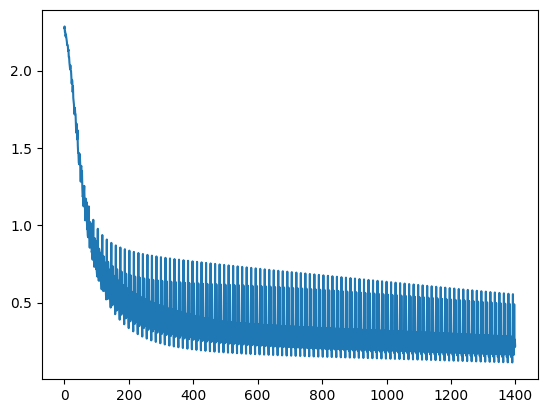

In [58]:
  plt.plot(losses)

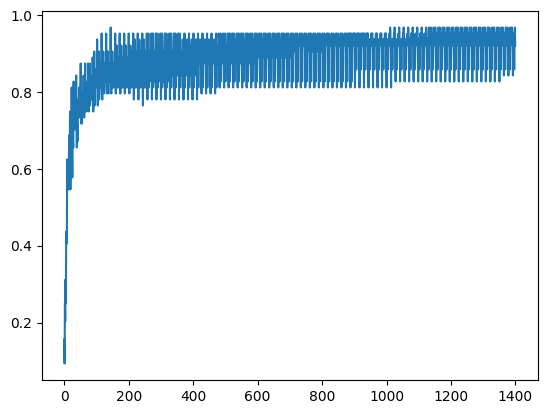

In [59]:
plt.plot(accuracies)